<a href="https://colab.research.google.com/github/bahti21/tech_specifications_for_work/blob/main/GFK_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%A5%D0%B0%D0%BC%D0%B8%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка и анализ данных:

Просмотрел оба файла, на момент возможного сущетсвовавания ячеек которые имеют ошибки или данные собраны неверно, или имеют неверный формат. (не стал проверять, так как видно, что с данными "ок", но можно сделать)

1. Найти и вывести долю повторных покупателей.
2.  Разделить повторных покупателей на три группы по тратам и найти долю каждой группы.
3. Рассчитать средний размер корзины внутри каждого федерального округа.
4.  Построить помесячный график трат.
5. Предложить группировку для переменной variant и проанализировать распределение.


In [59]:
import pandas as pd

demography_data = pd.read_csv('/content/demography_data.csv')  #вставьте путь файлов
purchase_data = pd.read_csv('/content/purchase_data.tsv', sep='\t')


In [5]:
demography_data = pd.read_csv('/content/demography_data.csv', sep=';') #отделил по точке с запятой
demography_data.head()

,hhkey,federatio
0,71fcc74df3b4f9199bb63118d6009b6a,Moscow
1,9f6251a7d0c6aa44f833f8006119138b,Moscow
2,47187a24bf554aa9fb13041936e6f854,Moscow
3,8a9e0ca7014a60a51a8d19fe6ab6c51d,Moscow
4,6f88bb0863d6fa7b3c4f4e3cadb45144,Moscow


Задача 1: Доля повторных покупателей

In [6]:
purchase_count = purchase_data.groupby('hhkey')['occaskey'].nunique()   #группировка данных по покупателям и счёт количества покупок каждого покупателя

repeat_buyers = purchase_count[purchase_count > 1].index     #пределение повторных покупателей

repeat_buyers_share = len(repeat_buyers) / len(purchase_count)    #доля повторных покупателей

repeat_buyers_share

0.5932636469221835

Задача 2: Группировка повторных покупателей по тратам

In [23]:
repeat_purchases = purchase_data[purchase_data['hhkey'].isin(repeat_buyers)]     #фильтрация только для повторных покупателей
total_spent = repeat_purchases.groupby('hhkey')['value'].sum()     #сумма для каждого повторного
tertiles = pd.qcut(total_spent, 3, labels=['light', 'medium', 'heavy'])    #деление на тертили
group_shares = tertiles.value_counts(normalize=True) #доли группы
group_shares

,proportion
value,
light,0.333594
medium,0.333594
heavy,0.332811


Задача 3: Рассчитать средний размер корзины внутри каждого федерального округа

In [24]:
repeat_purchases = repeat_purchases.merge(tertiles.rename('group'), left_on='hhkey', right_index=True)     #добавляю новую группу к нашим данным
merged_data = repeat_purchases.merge(demography_data, on='hhkey')   #объединяю таблицы
result = merged_data.groupby(['group', 'federatio'])['value'].mean().reset_index()    #средний размер корзины по нашим группам и федеральным округам
result

<ipython-input-24-a9cbe63798e7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = merged_data.groupby(['group', 'federatio'])['value'].mean().reset_index()


,group,federatio,value
0,light,Central,28.898697
1,light,Far East,33.170000
2,light,Moscow,24.432060
3,light,North-West,29.639093
4,light,Privolzhie,27.786295
5,light,Siberia,27.714393
6,light,South,27.929552
7,light,St.Petersburg,29.583250
8,light,Ural,25.504435
9,medium,Central,39.618379


from matplotlib import pyplot as plt
result['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

4. Построить помесячный график трат в категории в целом и по каналам

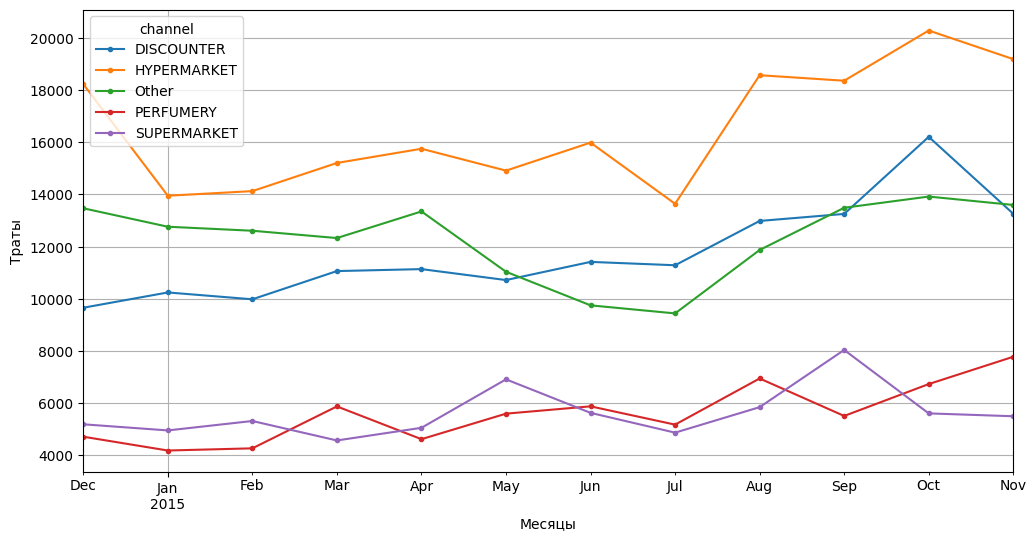

In [36]:
purchase_data['movedate'] = pd.to_datetime(purchase_data['movedate'], format='%Y%m%d')     #преобразование даты
purchase_data['year_month'] = purchase_data['movedate'].dt.to_period('M')  #создание столбца для года и месяца
monthly_spending = purchase_data.groupby(['year_month', 'channel'])['value'].sum().unstack()   #группировка
monthly_spending.plot(kind='line', figsize=(12, 6), marker='.')
plt.xlabel('Месяцы')
plt.ylabel('Траты')
plt.grid(True)
plt.show()

Вывод:


1.  Мы видим, что люди больше тратят на покупки в гипермаркетах, когда начинается осенний сезон (например, первое сентября, нужно закупить все к школе) и ближе к Новому году, когда все закупаются подарками.

2. Также большие траты осенью возрастают в дисконд-магазинах, наверное связано со скидками на зимнюю одежду перед сезоном.

3. Видно, что супермаркеты пользуются спросом для повседневных покупок в которых не тратят много денег, в отличие от гипермаркетов где можно закупиться чуть ли не на месяц.

4. В парфюмерии не тратят много денег, и видно что, например, в марте небольшой скачок трат, связанный скорее всего с 8 марта.



5. Предложить группировку переменной variant из 5-10 групп. Вывести распределение размера в рублях каждой получившейся группы на рынке

In [58]:
#анализ значений в variant
unique_variants = purchase_data['variant'].unique()

group_mapping = {
    'S ZAVYAZKAMI': 'With Ties',
    'S ZATYAZHKAMI': 'With Drawstrings',
    'PROCHNYE': 'Other',
    'S RUCHKAMI': 'With Handles',
    'SUPERPROCHNYE': 'Durable',
    'UDLINENNYE': 'Elongate'
}

#группировка
purchase_data['variant_group'] = purchase_data['variant'].map(group_mapping)

#группировка данных и счет в рублях для каждой группы
group_spending = purchase_data.groupby('variant_group')['value'].sum().reset_index()
group_spending

,variant_group,value
0,Durable,9525.000
1,Elongate,4109.890
2,Other,13059.450
3,With Drawstrings,31568.920
4,With Handles,13418.460
5,With Ties,120642.424
